<a href="https://colab.research.google.com/github/ME-UoP-ME421/Kalman-TSL/blob/main/Kalman_TSL_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q - Two Story Lateral Vibrations: Group Kalman-TSL
##Group Members
E/17/004  \\
E/17/053 \\
E/17/227 \\
E/17/286

#Setup

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy

from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.subplots import make_subplots


from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.integrate import odeint




###################################################################s



#Problem Discription and Governing Equations

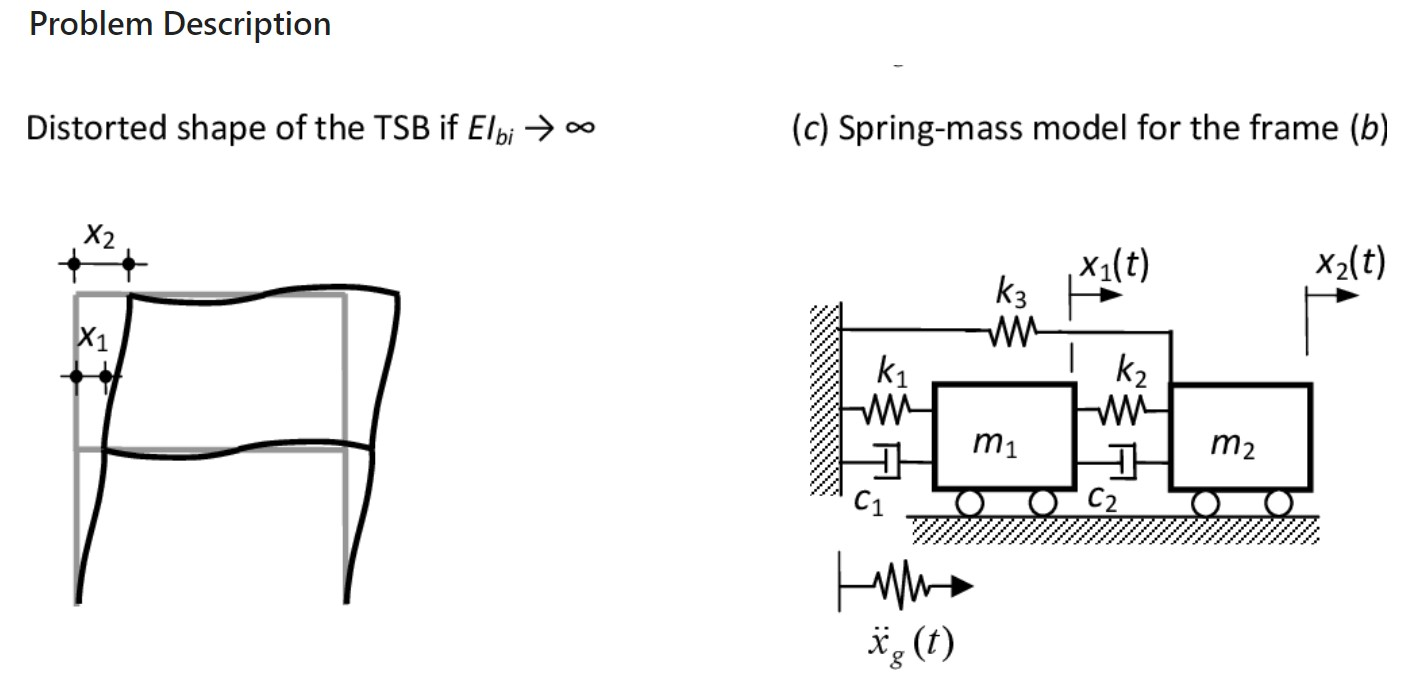

By applting Newtons equations \\
Considering the mas $m_1$ ;



\\begin{align*}
 m_1\ddot x_1+(c_1+c_2)\dot x_1-c_2  \dot x_2  +(k_1+k_2)x_1-k_2x_2 
=-m_1 \ddot x_g -->(1)\end{align*}
Considering the mas $m_2$ ;
\\begin{align*}
m_2 \ddot x_2 -c_2 \dot x_1 + c_2 \dot x_2 -k_2x_1 + (k_2+k_3)x_2 = -m_2 \ddot x_g -->(2)
\end{align*}


We could also write these equations in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} + \begin{bmatrix}c_1 + c_2 & -c_2 \\ -c_2 & c_2 \end{bmatrix}\begin{bmatrix}\dot{x}_1 \\ \dot{x}_2\end{bmatrix} + \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} =- \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix} 1 \\ 1\end{bmatrix} \ddot x_g$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

$ \quad C = \begin{bmatrix}c_1 + c_2 & -c_2 \\ -c_2 & c_2 \end{bmatrix} $



$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix} $

and 

$ \quad F = \begin{bmatrix} 1 \\ 1\end{bmatrix} \ddot x_g $

Then 

\\begin{align*}
M\ddot X+C \dot X+KX=F 
\end{align*}

\\begin{align*}
\ddot X+M^-C \dot X+M^-KX=F 
\end{align*}
 Let $\Omega =M^-K$ and $\zeta=M^-C$

 \\begin{align*}
\ddot X+\zeta \dot X+\Omega X=M^- F 
\end{align*}




Let Input Acceralation $\ddot x_g =A sin(w_o t) $  \\
Where  $\omega_o$ is External Force frequency  \\





* The system is a two-mass system with two degrees of freedom (2 DOF). In this system, two masses are connected by springs and dampers, allowing them to move in two different directions. Because there are two masses and two possible directions of motion, there are two natural frequencies at which the system can vibrate.

* These natural frequencies correspond to the system's two modes of vibration, which are characterized by specific patterns of motion for the masses. The first mode is typically a symmetric vibration, where the two masses move in phase with each other. The second mode is an anti-symmetric vibration, where the two masses move out of phase with each other.

* Understanding the natural frequencies and modes of vibration of a 2 DOF system is important for designing and analyzing mechanical systems, as it can help engineers predict how the system will behave under different conditions and identify potential sources of unwanted vibration or noise.



# Simulation of the system

##Natural Frequencies of the system

* The system has two modes of vibration, which correspond to the two natural frequencies. Each natural frequency is associated with a particular mode shape, which describes the pattern of motion of the masses and springs when the system vibrates at that frequency.

* Natural frequecies ($\omega_1 $,and $\omega_2 $) is given by squre roots of the matrix $\Omega$


In [ ]:
#NATURAL FREQUENCIES OF THE SYSTEM------------------------

# Define the system parameters
m1 = 2
m2 = 3
k1 = 2
k2 = 3
k3 = 1
c1 = 0.01
c2 = 0.01
A=2  #Amplitude of the input force
w=1  #Anguler frequency of input force

#Initial Conditions
x0 = [0, 0, 0, 0]
dis=6 # Initial Distance between two masses
t=10;

#Matrix reprecentation of the sysem
M = np.array([[m1, 0], [0, m2]])
C = np.array([[c1+c2, -c2], [-c2, c2]])
K = np.array([[k1+k2, -k2], [-k2, k2+k3]])
F = np.array([[-A*np.sin(w*t)],[-A*np.sin(w*t)]])

M_inv=np.linalg.inv(M)
#Omega =np.dot(np.dot(M_inv, K), -C)
Omega=M_inv @ K
eigvals=np.linalg.eigvals(Omega)
natural_freq = np.sqrt(np.abs(eigvals))
w1=natural_freq[0]                   #Natural frequency 1
w2=natural_freq[1]                   #Natural frequency 2
print("Natural Frequecy =",natural_freq[0]) 
print("Natural Frequecy =",natural_freq[1])


Natural Frequecy = 1.809208404157734
Natural Frequecy = 0.7483971430052079


##Simulation of Displacement of Amplitude of the Displacement of two masses with External Forcing Frequency

* When an external force is applied to system at a frequency equal to one of its natural frequencies, the system experiences resonance. Resonance is a phenomenon where the amplitude of vibration of the system increases significantly, which can lead to large displacements and potentially damage to the system.

* The amplitude of vibration of the system is maximum at the natural frequency because at this frequency, the external force is in phase with the motion of the system. This means that the force is applied when the system is at its maximum displacement in the same direction as the displacement, and the force is also applied when the system is at its maximum velocity in the same direction as the velocity. This results in a constructive interference between the external force and the motion of the system, leading to a large amplitude 
of vibration.


In [ ]:
#AMPLITUDE VARIATIONS----------------------------------------

w_range = np.linspace(0, 5, 1000)

# Function that returns the derivatives of the state variables
def f(x, t, m1, m2, k1, k2, k3, c1, c2, w1):
    x1, x2, x1_dot, x2_dot = x
    x1_ddot = ((-c1-c2)*x1_dot + c2*x2_dot - (k1+k2)*x1 + k2*x2 -m1*np.sin(w*t))/(m1)
    x2_ddot = (c2*x1_dot - c2*x2_dot + k2*x1 - (k2+k3)*x2 -m2*np.sin(w*t))/(m2)
    return [x1_dot, x2_dot, x1_ddot, x2_ddot]

# list to store the amplitudes
amp1 = []
amp2 = []

for w in w_range:
    sol = odeint(f, x0, [0, 100], args=(m1, m2, k1, k2, k3, c1, c2, w))
    x1 = sol[:, 0]
    x2 = sol[:, 1]

    # calculate the amplitudes
    A1 = max(abs(x1))
    A2 = max(abs(x2))
    amp1.append(A1)
    amp2.append(A2)

# Set up the plot
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(x=w_range, y=amp1, name='Mass 1'))

fig.add_trace( go.Scatter(x=w_range, y=amp2, name='mass 2 '))

fig.add_shape(type='line', x0=natural_freq[0], x1=natural_freq[0], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))
fig.add_shape(type='line', x0=natural_freq[1], x1=natural_freq[1], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))


fig.add_annotation(x=natural_freq[0], y=0, text='Natural Frequency w1', showarrow=False, arrowhead=1)
fig.add_annotation(x=natural_freq[1], y=0, text='Natural Frequency w2', showarrow=False, arrowhead=1)

fig.update_xaxes(title_text="time", range=[0, 5])
fig.update_yaxes(title_text="Amplitude", range=[0, 40])
fig.update_layout(title_text="Displacements Spring-Mass System ")


fig.show()

/usr/local/lib/python3.9/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


##Simulation of Motion of the two masses with time

###Numarical Solution(Runga kutta method)

In [ ]:
#NUMARICAL SOLUTION------------------------------------

#External Forcing Frequency
w= w1
# Define the Input force function
def Fu(w2,t):
    return 0.1*np.sin(w*t)

#System of diffrential Equarions
def f(t, y):
    x1, x2, x1_dot, x2_dot = y
  
    x1_ddot = ((-c1-c2)*x1_dot + c2*x2_dot - (k1+k2)*x1 + k2*x2 -m1*np.sin(w*t))/(m1)
    x2_ddot = (c2*x1_dot - c2*x2_dot + k2*x1 - (k2+k3)*x2 -m2*np.sin(w*t))/(m2)
    return [x1_dot, x2_dot, x1_ddot, x2_ddot]

# Set the initial conditions
y0 = x0
t_span = np.linspace(0, 50, 1000)

# Solve the system using the Runge-Kutta method
sol = solve_ivp(f, [t_span[0], t_span[-1]], y0, t_eval=t_span, method='RK45')


In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.005e-02 ...  4.995e+01  5.000e+01]
        y: [[ 0.000e+00 -3.778e-05 ... -1.047e+00 -1.204e+00]
            [ 0.000e+00 -3.778e-05 ...  1.317e+00  1.312e+00]
            [ 0.000e+00 -2.264e-03 ... -3.225e+00 -3.016e+00]
            [ 0.000e+00 -2.264e-03 ... -8.908e-03 -1.855e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 638
     njev: 0
      nlu: 0

###Displacemets of two mases (Plotly)

*  Displacements of the two masses in each mode of vibration depends on the specific mode shape of the system there are two modes of vibration, which correspond to the system's two natural frequencies.

* $ \textbf{First mode }$

* In the first mode of vibration, also known as the symmetric mode, the two masses move in phase with each other, and their displacements have the same magnitude but opposite signs. This means that the displacement of one mass is equal in magnitude but opposite in direction to the displacement of the other mass. The mode shape for the first mode of vibration is symmetric with respect to the midpoint between the masses.

* $ \textbf{Second mode }$

* In the second mode of vibration, also known as the anti-symmetric mode, the two masses move out of phase with each other, and their displacements have different magnitudes and the same sign. This means that one mass moves in one direction while the other mass moves in the opposite direction. The mode shape for the second mode of vibration is anti-symmetric with respect to the midpoint between the masses.

In [ ]:
#DISPLACEMENT OF TWO MASSES-------------------------------------
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]+dis

# Set up the plot
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(y=x1_pos, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="blue",)),
              )

fig.add_trace(go.Scatter(y=x2_pos, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="red")),
              )

fig.update_xaxes(title_text="time", range=[0, 50])
fig.update_yaxes(title_text="Position", range=[-30, 50])
fig.update_layout(title_text="Displacements Spring-Mass System ")

fig.show()

###Velocities vaiation of the system

* the velocities of the two masses vary differently in each mode of vibration. The two modes correspond to the two natural frequencies of the system, and each mode has its own specific pattern of motion for the masses and the springs.

* In the first mode of vibration, the two masses move in phase with each other and have the same velocity at any given time. This means that the velocity of one mass is equal in magnitude but opposite in sign to the velocity of the other mass. The velocity of each mass varies sinusoidally with time, with the same frequency as the natural frequency of the mode. At the maximum displacement of the masses, the velocity of each mass is zero, while at the equilibrium position of the masses, the velocity of each mass is maximum.

* In the second mode of vibration, the two masses move out of phase with each other and have different velocities at any given time. This means that one mass has a positive velocity while the other mass has a negative velocity. The velocity of each mass varies sinusoidally with time, with the same frequency as the natural frequency of the mode. At the maximum displacement of the masses, the velocity of one mass is maximum while the velocity of the other mass is zero. At the equilibrium position of the masses, the velocity of one mass is zero while the velocity of the other mass is maximum.

In [ ]:
#VELOCITIES OF TWO MASSES-------------------------------------

x1_dot =  sol.y[2,:]
x2_dot =  sol.y[3,:]

# Set up the plot
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(y=x1_dot, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="blue")),
              )

fig.add_trace(go.Scatter(y=x2_dot, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="red")),
              )

fig.update_xaxes(title_text="Time", range=[0, 50])
fig.update_yaxes(title_text="Velocity", range=[-20, 30])
fig.update_layout(title_text="Velocity variation of Spring-Mass System ")

fig.show()

### Animating motion of the system

*  Displacements of the two masses in each mode of vibration depends on the specific mode shape of the system there are two modes of vibration, which correspond to the system's two natural frequencies.

* $ \textbf{First mode }$

* In the first mode of vibration, also known as the symmetric mode, the two masses move in phase with each other, and their displacements have the same magnitude but opposite signs. This means that the displacement of one mass is equal in magnitude but opposite in direction to the displacement of the other mass. The mode shape for the first mode of vibration is symmetric with respect to the midpoint between the masses.

* $ \textbf{Second mode }$

* In the second mode of vibration, also known as the anti-symmetric mode, the two masses move out of phase with each other, and their displacements have different magnitudes and the same sign. This means that one mass moves in one direction while the other mass moves in the opposite direction. The mode shape for the second mode of vibration is anti-symmetric with respect to the midpoint between the masses.

In [ ]:

#ANIMATING THE SYSTEM MOTION
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]+dis
t_span = sol.t

# Define the data and layout for the initial frame
x1_init = x1_pos[0]
x2_init = x2_pos[0]+dis

fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(x=[x1_init], y=[0],
                         mode="markers",
                         marker=dict(size=20, color="blue")),
              )

fig.add_trace(go.Scatter(x=[x2_init], y=[0],
                         mode="markers",
                         marker=dict(size=30, color="red")),
              )

fig.update_xaxes(title_text="Horizontal Position", range=[-20, 20])
fig.update_yaxes(title_text="Verticle position", range=[-3, 3])
fig.update_layout(title_text="Motion of the 2 masses of Spring-Mass System ")

# Define the animation frames
frames = [go.Frame(data=[
                        go.Scatter(x=[x1_pos[i]], y=[0], 
                                   mode="markers", 
                                   marker=dict(size=20, color="blue")),
                        go.Scatter(x=[x2_pos[i]], y=[0], 
                                   mode="markers", 
                                   marker=dict(size=30, color="red"))
                        ]
                   ) 
          for i in range(len(t_span))
         ]

# Add frames and animation settings
fig.frames = frames

animation_settings = dict(frame=dict(duration=10, redraw=True),
                          fromcurrent=True,
                          transition=dict(duration=0),
                          )

fig.update_layout(updatemenus=[dict(type="buttons",
                                    showactive=False,
                                    buttons=[dict(label="Play",
                                                  method="animate",
                                                  args=[None, animation_settings]
                                                  ),
                                             dict(label="Pause",
                                                  method="animate",
                                                  args=[[None], animation_settings]
                                                  )
                                             ],
                                    )
                               ]
                  )

fig.show()

#Extra Plottings

##Nunarical Solution(Runga kutta method)

In [ ]:

# Define the system parameters
m1 = 2
m2 = 3
k1 = 2
k2 = 3
k3 = 0
c1 = 0.0
c2 = 0.0
dis=2
w=0.29
# Define the system of differential equations

def Fu(w2,t):
    return 0.1*np.sin(w*t)


def f(t, y):
    x1, x2, x1_dot, x2_dot = y
  
    x1_ddot = ((-c1-c2)*x1_dot + c2*x2_dot - (k1+k2)*x1 + k2*x2 -m1*np.sin(w*t))/(m1)
    x2_ddot = (c2*x1_dot - c2*x2_dot + k2*x1 - (k2+k3)*x2 -m2*np.sin(w*t))/(m2)
    return [x1_dot, x2_dot, x1_ddot, x2_ddot]

# Set the initial conditions
y0 = [0, 0, 0, 0]

# Set the time span
t_span = np.linspace(0, 500, 1000)

# Solve the system using the Runge-Kutta method
sol = solve_ivp(f, [t_span[0], t_span[-1]], y0, t_eval=t_span, method='RK45')


##Ploting(Plotly)

In [ ]:
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]+dis

# Set up the plot
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(y=x1_pos, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="blue")),
              )

fig.add_trace(go.Scatter(y=x2_pos, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="red")),
              )

fig.update_xaxes(title_text="time", range=[0, 500])
fig.update_yaxes(title_text="Position", range=[-5, 10])
fig.update_layout(title_text="Spring-Mass System Plot")

fig.show()

##Ploting (Mat plot lib)

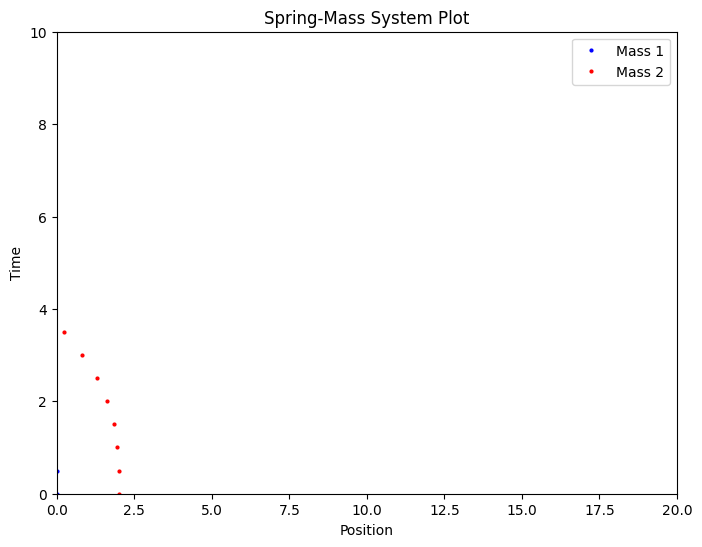

In [ ]:
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]+dis
t_span = sol.t


# Set up the plot
plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Spring-Mass System Plot')

# Plot the position vs. time for both masses
plt.plot(x1_pos, t_span, 'bo', markersize=2, label='Mass 1')
plt.plot(x2_pos, t_span, 'ro', markersize=2, label='Mass 2')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

##Animating (Plotly)

In [ ]:
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]
t_span = sol.t
dif=3
# Define the data and layout for the initial frame
x1_init = x1_pos[0]
x2_init = x2_pos[0]+dif

fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(x=[x1_init], y=[0],
                         mode="markers",
                         marker=dict(size=20, color="blue")),
              )

fig.add_trace(go.Scatter(x=[x2_init], y=[0],
                         mode="markers",
                         marker=dict(size=30, color="red")),
              )

fig.update_xaxes(title_text="Position", range=[-5, 5])
fig.update_yaxes(title_text="Time", range=[-3, 3])
fig.update_layout(title_text="Spring-Mass System Animation")

# Define the animation frames
frames = [go.Frame(data=[
                        go.Scatter(x=[x1_pos[i]], y=[0], 
                                   mode="markers", 
                                   marker=dict(size=20, color="blue")),
                        go.Scatter(x=[x2_pos[i]+dif], y=[0], 
                                   mode="markers", 
                                   marker=dict(size=30, color="red"))
                        ]
                   ) 
          for i in range(len(t_span))
         ]

# Add frames and animation settings
fig.frames = frames

animation_settings = dict(frame=dict(duration=10, redraw=True),
                          fromcurrent=True,
                          transition=dict(duration=0),
                          )

fig.update_layout(updatemenus=[dict(type="buttons",
                                    showactive=False,
                                    buttons=[dict(label="Play",
                                                  method="animate",
                                                  args=[None, animation_settings]
                                                  ),
                                             dict(label="Pause",
                                                  method="animate",
                                                  args=[[None], animation_settings]
                                                  )
                                             ],
                                    )
                               ]
                  )

# Show the animation
fig.show()

##Animating (Mat plot lib)

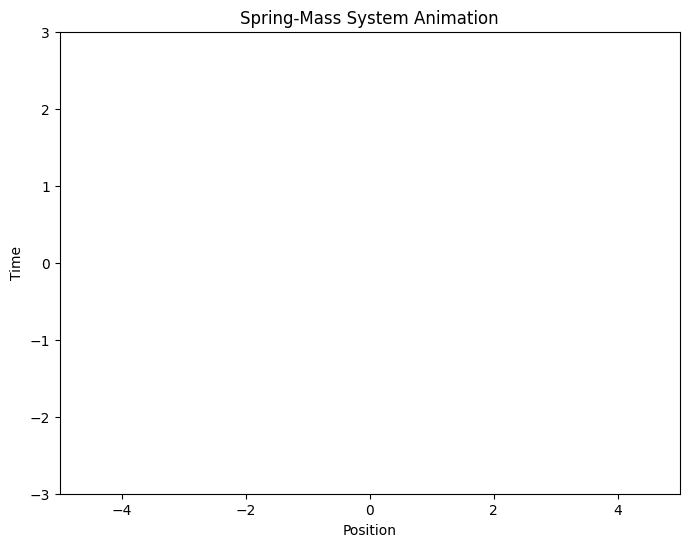

In [ ]:
x1_pos = sol.y[0,:]
x2_pos = sol.y[1,:]+dis
t_span = sol.t




# Set up the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)
ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_title('Spring-Mass System Animation')

# Initialize the line objects
line1, = ax.plot([], [], 'bo', markersize=20)
line2, = ax.plot([], [], 'ro', markersize=30)

# Define the initialization function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

# Define the animation function
def animate(i):
    line1.set_data(x1_pos[i], 0)
    line2.set_data(x2_pos[i], 0)
    return line1, line2,

# Create the animation
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t_span), interval=10, blit=True)

# Show the animation
plt.show()
anim